In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

current_dir = os.getcwd()
datasets_dir = os.path.join(current_dir, 'datasets')
awards_players_path = os.path.join(datasets_dir, 'awards_players.csv')
coaches_path = os.path.join(datasets_dir, 'coaches.csv')
players_teams_path = os.path.join(datasets_dir, 'players_teams.csv')
players_path = os.path.join(datasets_dir, 'players.csv')
series_post_path = os.path.join(datasets_dir, 'series_post.csv')
team_post_path = os.path.join(datasets_dir, 'teams_post.csv')
teams_path = os.path.join(datasets_dir, 'teams.csv')

In [2]:
# Read the dataset from the CSV file
def read_dataset(path):
    file = pd.read_csv(path)
    return file

# Calculate the mean for each column
def mean_for_each_column(dataset):
    print("..........Mean for each column..........")
    print(str(dataset.mean(numeric_only=True))+"\n")

# Calculate the median for each column
def median_for_each_column(dataset):
    print("..........Median for each column..........")
    print(str(dataset.median(numeric_only=True))+"\n")

# Calculate the mode for each column
def mode_for_each_column(dataset):
    print("..........Mode for each column..........")
    print(str(dataset.mode().iloc[0]) + "\n")

# Calculate the % of missing values for each column
def missing_value_percentage_for_each_column(dataset):
    total = dataset.shape[0]  # Number of lines
    missing_values = dataset.isnull().sum()  # Sum of the missing values in each column
    percentage = (missing_values / total) * 100  # Calculate the percentage of missing values in each column
    print("..........% of missing values..........")
    print(percentage)

# Box-plot for each column
def box_plot_for_each_column(dataset):
    numeric_columns = dataset.select_dtypes(include='number')
    if numeric_columns.empty:
        print("No numeric columns found in the dataset.")
    else:
        numeric_columns.boxplot(figsize=(10, 6))
        plt.title("Boxplot for all numeric columns")
        plt.xticks(rotation=45)  # Rotation in x, if necessary
        plt.show()

# Bar-chart for each column
def bar_chart_for_each_column(dataset):
    non_numeric_columns = dataset.select_dtypes(exclude='number')
    if non_numeric_columns.empty:
        print("Any non-numeric columns found in the dataset.")
    else:
        for column in non_numeric_columns.columns:
            value_counts = non_numeric_columns[column].value_counts()
            plt.figure(figsize=(10, 6))
            value_counts.plot(kind='bar')
            plt.title(f"Bar chart for '{column}'")
            plt.xlabel(column)
            plt.ylabel("Count")
            plt.xticks(rotation=45)
            plt.tight_layout()  # Adjust layout to prevent overlap
            plt.show()

# Pie-chart for each column
def pie_chart_for_each_column(dataset):
    non_numeric_columns = dataset.select_dtypes(exclude='number')
    
    if non_numeric_columns.empty:
        print("Any non-numeric columns found in the dataset.")
    else:
        for column in non_numeric_columns.columns:
            # Count elements from different categories
            category_counts = dataset[column].value_counts()
            
            # Pie-chart
            plt.figure(figsize=(6, 6))
            category_counts.plot.pie(autopct='%1.1f%%', startangle=140)
            plt.title(f'Distribution of {column}')
            plt.ylabel('')  # Remove o rótulo do eixo Y
            plt.show()

#Pearson-correlation
def pearson_correlation(dataset):
    numeric_columns = dataset.select_dtypes(include='number')
    
    if numeric_columns.empty:
        print("Nenhuma coluna numérica encontrada no dataset.")
    else:
        # Correlation matrix
        correlation_matrix = numeric_columns.corr()

        # View
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Pearson-correlation')
        plt.show()

#normalizar os valores entre o valor minimo e maximo
def normalize_min_max(dataset):
    # Seleciona as colunas numéricas
    numeric_columns = dataset.select_dtypes(include='number')
    
    # Verifica se existem colunas numéricas
    if numeric_columns.empty:
        print("Nenhuma coluna numérica encontrada no dataset.")
        return dataset  # Retorna o dataset sem modificações se não houver colunas numéricas
    
    # Aplica a normalização Min-Max nas colunas numéricas
    dataset[numeric_columns.columns] = (numeric_columns - numeric_columns.min()) / (numeric_columns.max() - numeric_columns.min())
    
    return dataset

#normalizar com base em média 0 e desvio padrão 1
def normalize_mean_std(dataset):
    # Seleciona as colunas numéricas
    numeric_columns = dataset.select_dtypes(include='number')
    
    # Verifica se existem colunas numéricas
    if numeric_columns.empty:
        print("Nenhuma coluna numérica encontrada no dataset.")
        return dataset  # Retorna o dataset sem modificações se não houver colunas numéricas
    
    # Aplica a normalização Min-Max nas colunas numéricas
    dataset[numeric_columns.columns] = (numeric_columns - numeric_columns.mean()) / numeric_columns.std()
    
    return dataset

# Guardar o dataset modificado numa nova pasta
def save_cleaned_dataset(dataset, original_filename, new_folder_name='datasetsTratados'):
    # Criar a nova pasta, se não existir
    if not os.path.exists(new_folder_name):
        os.makedirs(new_folder_name)
    
    # Definir o novo caminho de destino para o dataset
    base_filename = os.path.basename(original_filename)
    new_file_path = os.path.join(new_folder_name, base_filename)
    
    # Guardar o novo dataset
    dataset.to_csv(new_file_path, index=False)
    print(f"Dataset guardado em: {new_file_path}")


In [3]:
try:
    awards_players_file = read_dataset(awards_players_path)
    coaches_file = read_dataset(coaches_path)
    players_teams_file = read_dataset(players_teams_path)
    players_file = read_dataset(players_path)
    series_post_file = read_dataset(series_post_path)
    team_post_file = read_dataset(team_post_path)
    teams_file = read_dataset(teams_path)
    print("..........Dataset..........")
    print(awards_players_file)
    print(coaches_file)
    print(players_teams_file)
    print(players_file)
    print(series_post_file)
    print(team_post_file)
    print(teams_file) 

except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print(f"Error: {e}")

..........Dataset..........
      playerID                                   award  year  lgID
0   thompti01w      All-Star Game Most Valuable Player     1  WNBA
1   leslili01w      All-Star Game Most Valuable Player     2  WNBA
2   leslili01w      All-Star Game Most Valuable Player     3  WNBA
3   teaslni01w      All-Star Game Most Valuable Player     4  WNBA
4   swoopsh01w      All-Star Game Most Valuable Player     6  WNBA
..         ...                                     ...   ...   ...
90  boltoru01w  WNBA All Decade Team Honorable Mention     7  WNBA
91  holdsch01w  WNBA All Decade Team Honorable Mention     7  WNBA
92  penicti01w  WNBA All Decade Team Honorable Mention     7  WNBA
93  tauradi01w  WNBA All Decade Team Honorable Mention     7  WNBA
94  weathte01w  WNBA All Decade Team Honorable Mention     7  WNBA

[95 rows x 4 columns]
        coachID  year tmID  lgID  stint  won  lost  post_wins  post_losses
0    adamsmi01w     5  WAS  WNBA      0   17    17          1         

In [4]:
awards_players_file = awards_players_file.drop(awards_players_file.columns[3], axis=1)
coaches_file = coaches_file.drop(coaches_file.columns[3], axis=1)
players_teams_file = players_teams_file.drop(players_teams_file.columns[4], axis=1)
players_file = players_file[players_file['pos'].notna() & (players_file['pos'] != '')]
players_file = players_file.drop(players_file.columns[[2,3,9]], axis=1)
series_post_file = series_post_file.drop(series_post_file.columns[[4,6]], axis=1)
team_post_file = team_post_file.drop(team_post_file.columns[2], axis=1)
teams_file = teams_file.drop(teams_file.columns[[1,5]], axis=1)

print(awards_players_file)
print(coaches_file)
print(players_teams_file)
print(players_file)
print(series_post_file)
print(team_post_file)
print(teams_file) 

      playerID                                   award  year
0   thompti01w      All-Star Game Most Valuable Player     1
1   leslili01w      All-Star Game Most Valuable Player     2
2   leslili01w      All-Star Game Most Valuable Player     3
3   teaslni01w      All-Star Game Most Valuable Player     4
4   swoopsh01w      All-Star Game Most Valuable Player     6
..         ...                                     ...   ...
90  boltoru01w  WNBA All Decade Team Honorable Mention     7
91  holdsch01w  WNBA All Decade Team Honorable Mention     7
92  penicti01w  WNBA All Decade Team Honorable Mention     7
93  tauradi01w  WNBA All Decade Team Honorable Mention     7
94  weathte01w  WNBA All Decade Team Honorable Mention     7

[95 rows x 3 columns]
        coachID  year tmID  stint  won  lost  post_wins  post_losses
0    adamsmi01w     5  WAS      0   17    17          1            2
1    adubari99w     1  NYL      0   20    12          4            3
2    adubari99w     2  NYL      0   21

In [5]:
# Ler o dataset
try:
    mean_for_each_column(awards_players_file)
    median_for_each_column(awards_players_file)
    mode_for_each_column(awards_players_file)
    missing_value_percentage_for_each_column(awards_players_file)

except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print(f"Error: {e}")


..........Mean for each column..........
year    5.789474
dtype: float64

..........Median for each column..........
year    7.0
dtype: float64

..........Mode for each column..........
playerID           leslili01w
award       Coach of the Year
year                      7.0
Name: 0, dtype: object

..........% of missing values..........
playerID    0.0
award       0.0
year        0.0
dtype: float64


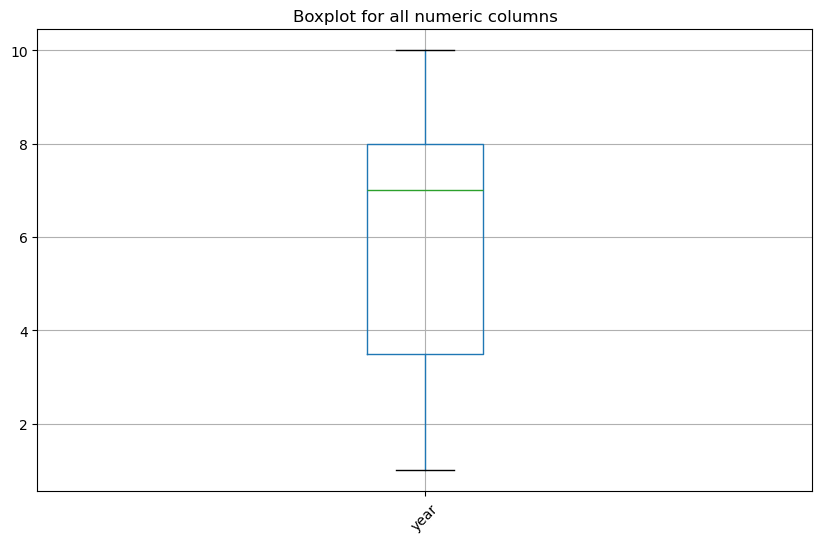

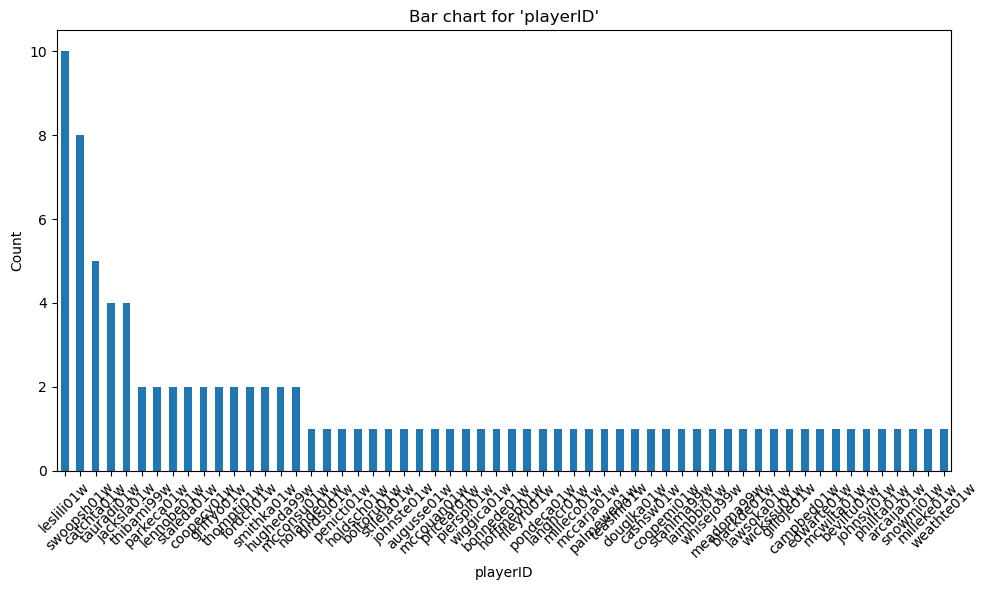

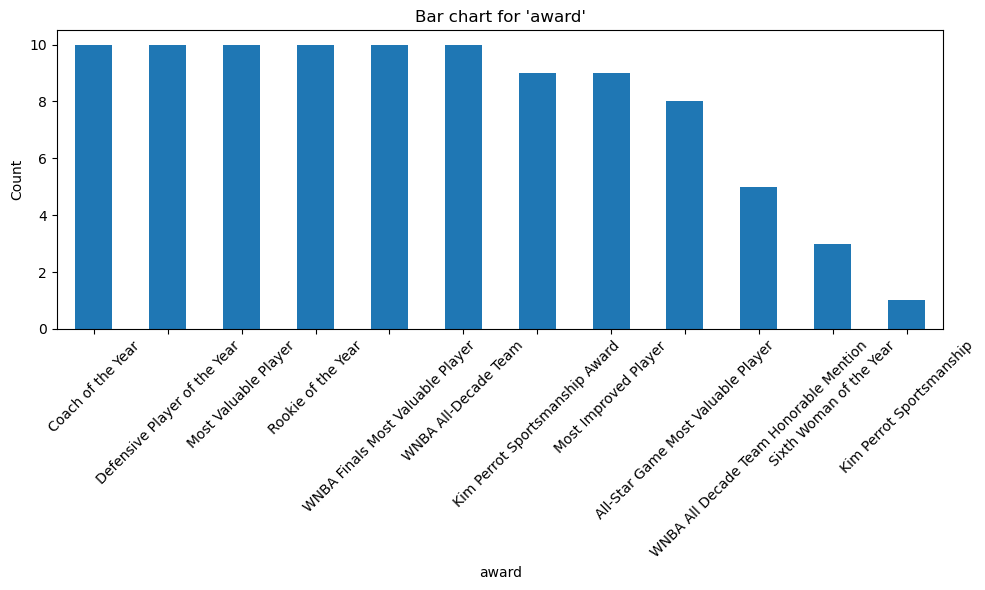

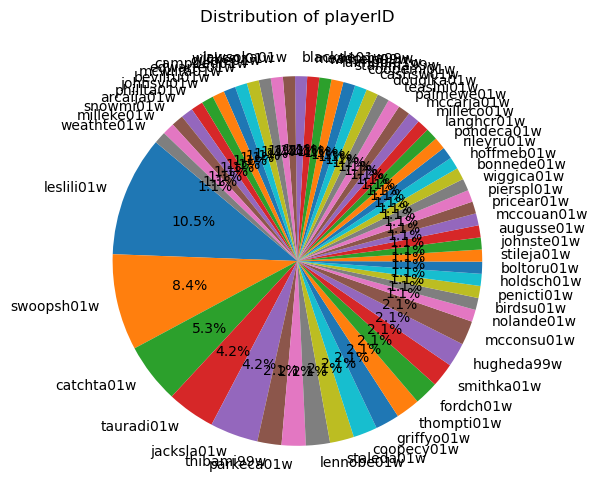

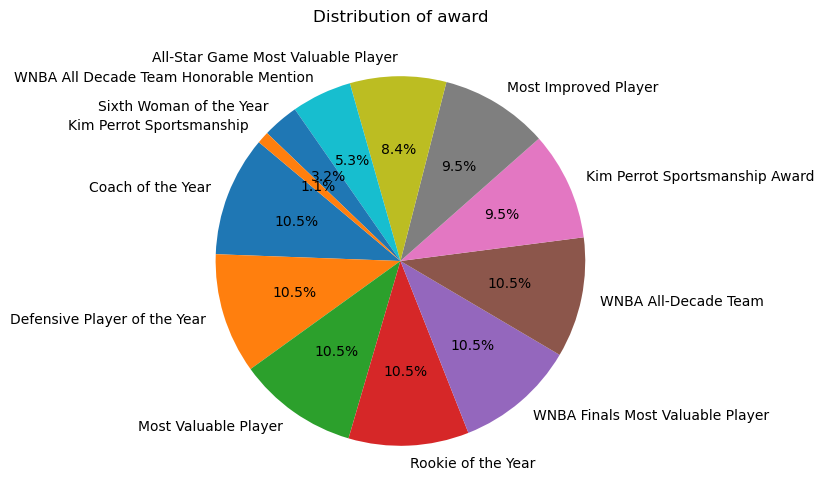

In [6]:

# Ler o dataset
try:
    # Criar box-plot e gráfico de barras
    box_plot_for_each_column(awards_players_file)
    bar_chart_for_each_column(awards_players_file)
    pie_chart_for_each_column(awards_players_file)

except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print(f"Error: {e}")

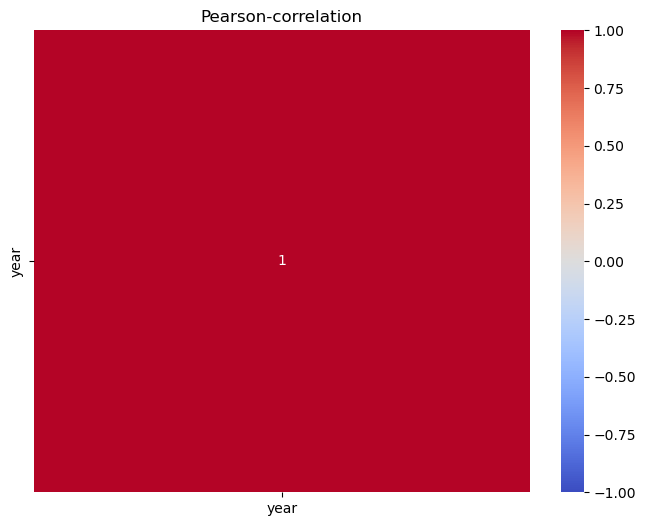

In [7]:
try:
    # Correlations
    pearson_correlation(awards_players_file)

except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print(f"Error: {e}")

In [8]:
try:    
    print("..........Normalizacao com base min-max..........")
    print(normalize_min_max(awards_players_file))
    print("..........Normalizacao com base moda e desvio padrao..........")
    print(normalize_mean_std(awards_players_file))

except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print(f"Error: {e}")


..........Normalizacao com base min-max..........
      playerID                                   award      year
0   thompti01w      All-Star Game Most Valuable Player  0.000000
1   leslili01w      All-Star Game Most Valuable Player  0.111111
2   leslili01w      All-Star Game Most Valuable Player  0.222222
3   teaslni01w      All-Star Game Most Valuable Player  0.333333
4   swoopsh01w      All-Star Game Most Valuable Player  0.555556
..         ...                                     ...       ...
90  boltoru01w  WNBA All Decade Team Honorable Mention  0.666667
91  holdsch01w  WNBA All Decade Team Honorable Mention  0.666667
92  penicti01w  WNBA All Decade Team Honorable Mention  0.666667
93  tauradi01w  WNBA All Decade Team Honorable Mention  0.666667
94  weathte01w  WNBA All Decade Team Honorable Mention  0.666667

[95 rows x 3 columns]
..........Normalizacao com base moda e desvio padrao..........
      playerID                                   award      year
0   thompti01w     